# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

from lisc import Words
from lisc.data import Articles, ArticlesAll
from lisc.utils import save_object, load_object
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values

## Setup

In [2]:
# Settings
CUR_DATA = 'load'               # 'load', 'file', 'test'
SAVE_FIG = False

In [3]:
# Set the location of the terms
term_dir = '../terms/'

In [4]:
# Initialize words-analysis object
words = Words()

In [5]:
# Add list of ERPs from file, and list of exclusion words
if CUR_DATA == 'file':

    words.add_terms_file('erps.txt', directory=term_dir)
    words.add_terms_file('exclusions.txt', term_type='exclusions', directory=term_dir)
    
# OR: Set small set of ERPs and terms for tests    
elif CUR_DATA == 'test':
    
    erps = [['P180'], ['N240']]
    exclusions = [['protein', 'q21'], ['cancer', 'histone', 'cell']]

    words.add_terms(erps)
    words.add_terms(exclusions, term_type='exclusions')

# Load from pickle file
elif CUR_DATA == 'load':
    
    name = 'BaseScrape.p'
    words = load_object(name)

else: 
    raise ValueError('Data setting not understood.')

In [6]:
# If not loading, run the scrape
if CUR_DATA in ['file', 'test']:
    
    # Scrape word data for all ERP abstracts
    words.run_collection(db='pubmed', retmax='5', usehistory=False)
    
    # Save pickle of word object
    save_object(words, 'test')

### Check Database Information

In [7]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210119-2212m.3',
 'count': '32034250',
 'lastupdate': '2021/01/20 15:07'}

In [8]:
# Check requester object info
words.meta_data.requester

{'n_requests': 5,
 'wait_time': 0.3333333333333333,
 'start_time': '15:51:18 Thursday 21 January 2021',
 'end_time': '15:51:21 Thursday 21 January 2021',
 'logging': None}

## Data Organization

In [9]:
# Check if data not loaded, and reload if so
for erp in words.labels:
    if not words[erp].n_articles:
        words[erp].load()

In [10]:
# Collect ERPs into list of aggragated data objects
all_data = [ArticlesAll(words[erp]) for erp in words.labels]

### Check Number of Articles

In [11]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 2


In [12]:
# Check the total number of articles in the collected dataset
total_article_count = sum([data.n_articles for data in all_data])
print('Number of papers: \t', total_article_count)

Number of papers: 	 10


In [13]:
# Collet all the DOIs across all papers
dois = get_all_values(all_data, 'dois', unique=True)

In [14]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 10


### Collect information across all ERPs & papers

In [15]:
# Get global counts of authors and journals
all_authors = get_all_counts(all_data, 'authors', combine=True)
all_journals = get_all_counts(all_data, 'journals', combine=True)

In [16]:
# Check the most common authors
all_authors.most_common(2)

[(('Li', 'Y'), 2), (('Mendoza-Medialdea', 'MT'), 1)]

In [17]:
# Check the most common journals
all_journals.most_common(2)

[('International journal of psychophysiology : official journal of the International Organization of Psychophysiology',
  1),
 ('Brain sciences', 1)]

## Check Words

In [18]:
# Check most common words
for data in all_data:
    data.check_frequencies(n_check=5)

P100  : patients , response , visual , stimuli , emotional
N100  : positive , empathy , ap , curing , gaze


In [19]:
# Check most common keywords
for data in all_data:
    data.check_frequencies('keywords', n_check=5)

P100  : event-related potentials , disgust , exogenous attention , fear , interoceptive accuracy
N100  : affective priming , fluency processing , n100/p200 , n400 , negativity bias


### Summaries

In [20]:
# Check an example summary
ind = 0
all_data[ind].create_summary()
all_data[ind].print_summary()

P100 :
  Number of articles: 		 5
  First publication: 		 2020
  Most common author: 		 Mendoza-Medialdea MT
    number of publications: 	 1
  Most common journal: 		 International journal of psychophysiology : official journal of the International Organization of Psychophysiology
    number of publications: 	 1 



### WordCloud Plots

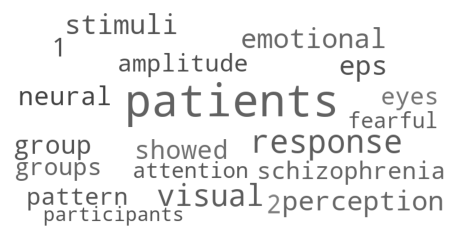

In [21]:
# Create a wordcloud
plot_wordcloud(all_data[ind].words, 20)

### Data Plots

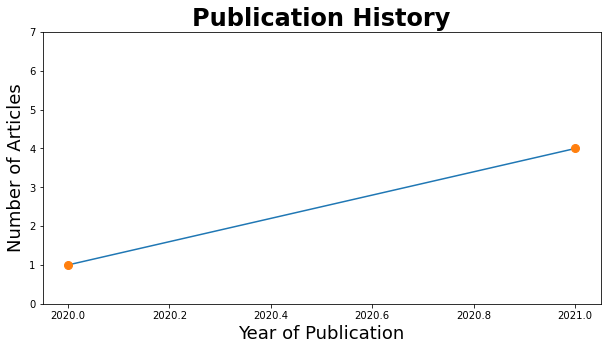

In [22]:
# Check an example history plot
plot_years(all_data[ind].years)